In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD

In [4]:
train = pd.read_csv("train_data.csv")

In [5]:
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,...,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,...,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,...,195,184,169,196,189,171,195,190,171,1


In [6]:
x_train = train.drop(['label'], axis = 1).values
y_train = train['label'].values

In [7]:
x_train.shape

(50000, 3072)

In [8]:
x_train = x_train.reshape((50000, 32, 32, 3)).astype('float32')/255

In [9]:
test = pd.read_csv("test_data.csv")

In [10]:
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9996,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9997,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9998,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (32,32,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

sgd = SGD(learning_rate = 0.1)
model.compile(optimizer= sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8

In [12]:
r = model.fit(x_train, y_train, validation_split=0.2, epochs = 11, batch_size = 64)

Epoch 1/11
625/625 [==============================] - 16s 25ms/step - loss: 2.0761 - accuracy: 0.2256 - val_loss: 1.9288 - val_accuracy: 0.2736
Epoch 2/11
625/625 [==============================] - 16s 26ms/step - loss: 1.6433 - accuracy: 0.3869 - val_loss: 1.3111 - val_accuracy: 0.5407
Epoch 3/11
625/625 [==============================] - 17s 27ms/step - loss: 1.3877 - accuracy: 0.4995 - val_loss: 1.3235 - val_accuracy: 0.5403
Epoch 4/11
625/625 [==============================] - 17s 27ms/step - loss: 1.2292 - accuracy: 0.5602 - val_loss: 1.1897 - val_accuracy: 0.5747
Epoch 5/11
625/625 [==============================] - 17s 27ms/step - loss: 1.1063 - accuracy: 0.6077 - val_loss: 1.0303 - val_accuracy: 0.6427
Epoch 6/11
625/625 [==============================] - 17s 27ms/step - loss: 1.0075 - accuracy: 0.6435 - val_loss: 0.9834 - val_accuracy: 0.6586
Epoch 7/11
625/625 [==============================] - 17s 27ms/step - loss: 0.9192 - accuracy: 0.6741 - val_loss: 1.1059 - val_accuracy:

In [13]:
x_test = test.values

In [14]:
x_test = test.drop(columns=test.columns[0]).values.reshape(-1, 32, 32, 3).astype('float32') / 255



In [15]:
test = pd.read_csv("test_data.csv")

In [16]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (32,32,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

sgd = SGD(learning_rate = 0.1)
model.compile(optimizer= sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [17]:
r = model.fit(x_train, y_train, validation_split=0.2, epochs = 11, batch_size = 64)

Epoch 1/11
625/625 [==============================] - 15s 24ms/step - loss: 1.8644 - accuracy: 0.3194 - val_loss: 1.4594 - val_accuracy: 0.4497
Epoch 2/11
625/625 [==============================] - 14s 23ms/step - loss: 1.4353 - accuracy: 0.4827 - val_loss: 1.2435 - val_accuracy: 0.5656
Epoch 3/11
625/625 [==============================] - 14s 23ms/step - loss: 1.2479 - accuracy: 0.5558 - val_loss: 1.1641 - val_accuracy: 0.5952
Epoch 4/11
625/625 [==============================] - 15s 24ms/step - loss: 1.1240 - accuracy: 0.6022 - val_loss: 1.0324 - val_accuracy: 0.6407
Epoch 5/11
625/625 [==============================] - 15s 25ms/step - loss: 1.0257 - accuracy: 0.6368 - val_loss: 0.9921 - val_accuracy: 0.6552
Epoch 6/11
625/625 [==============================] - 16s 25ms/step - loss: 0.9379 - accuracy: 0.6669 - val_loss: 1.0267 - val_accuracy: 0.6467
Epoch 7/11
625/625 [==============================] - 16s 25ms/step - loss: 0.8575 - accuracy: 0.6952 - val_loss: 1.0166 - val_accuracy:

In [19]:
x_test = test.values


In [21]:
x_test = test.drop(columns=test.columns[0]).values.reshape(-1, 32, 32, 3).astype('float32') / 255


In [22]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [23]:
predictions

array([[5.50811738e-02, 2.66535766e-03, 1.18170632e-02, ...,
        8.11437070e-01, 1.07796479e-03, 8.66469368e-03],
       [1.52488360e-02, 3.43506709e-02, 3.01574687e-06, ...,
        1.53498284e-10, 9.50381577e-01, 1.58864968e-05],
       [5.60218133e-02, 1.11740734e-02, 4.62296605e-01, ...,
        3.90293747e-02, 3.76777612e-02, 2.87565426e-03],
       ...,
       [6.58793550e-04, 1.02044556e-04, 1.94343850e-01, ...,
        8.19941312e-02, 7.64006199e-06, 1.10523935e-04],
       [5.08587100e-02, 2.31642559e-01, 2.35809267e-01, ...,
        4.80143838e-02, 5.64557798e-02, 4.89084199e-02],
       [1.57660525e-03, 2.79480754e-03, 1.58319220e-01, ...,
        3.24689150e-01, 3.83444061e-03, 8.98946135e-04]], dtype=float32)

In [24]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

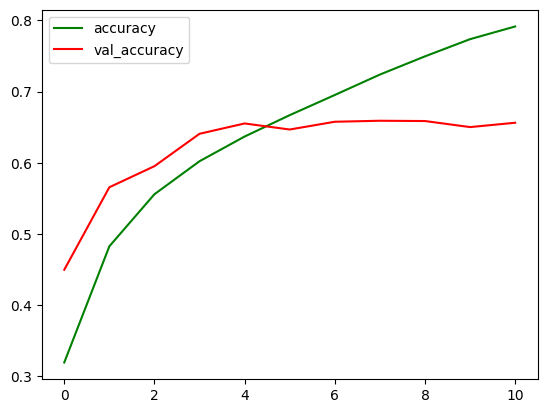

In [25]:
plt.plot(r.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy', color = 'red')
plt.legend()

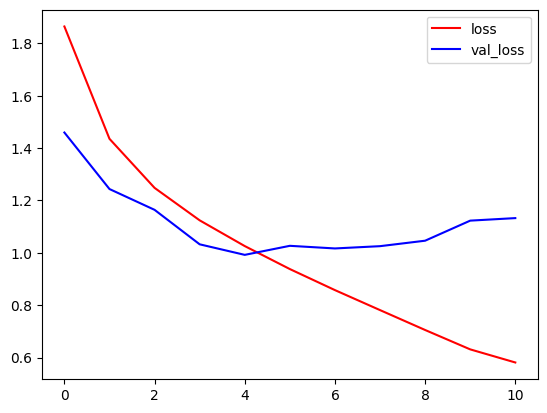

In [26]:
plt.plot(r.history['loss'], label = 'loss', color = 'red')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()